# Visualizing Gender Gap in Uni Degrees

In this project, [data](https://nces.ed.gov/programs/digest/2013menu_tables.asp) from the Department of Education Statistics in the US is visualized into appropriate forms for comparing the gender gaps in various majors. The dataset being used can be found [here](www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).

To start with, we'll plot 6 basic graphs for the majors listed in the `stem_cats` list seen below.

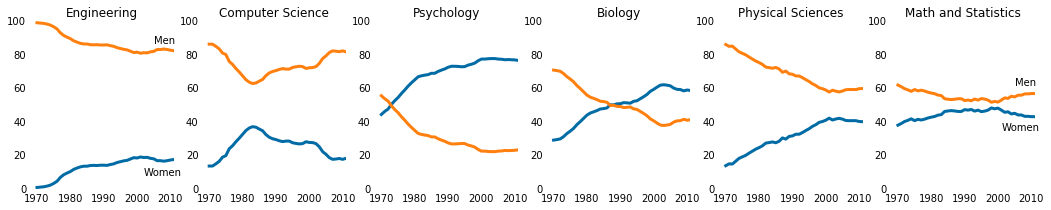

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

The above 6 line chart graphs are only for STEM degrees. It'd be more helpful to see a comparison of gender ratio changes in STEM degrees, as well as those in degrees of other categories.

We'll compare the above 6 degrees against 11 other degrees that fall into different categories.

Because there are thus going to be 17 total degrees that we will generate line charts for, a subplot grid layout of 6 rows by 3 columns will be used. 

The 17 degrees will then be grouped into 'STEM', 'Liberal Arts', and 'Other' like so:

In [4]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

One thing to note about the above lists is that they're ordered by decrease of the percentage of degrees awarded to female students. 

Now, 3 columns will of graphs will be generated, one for each category.

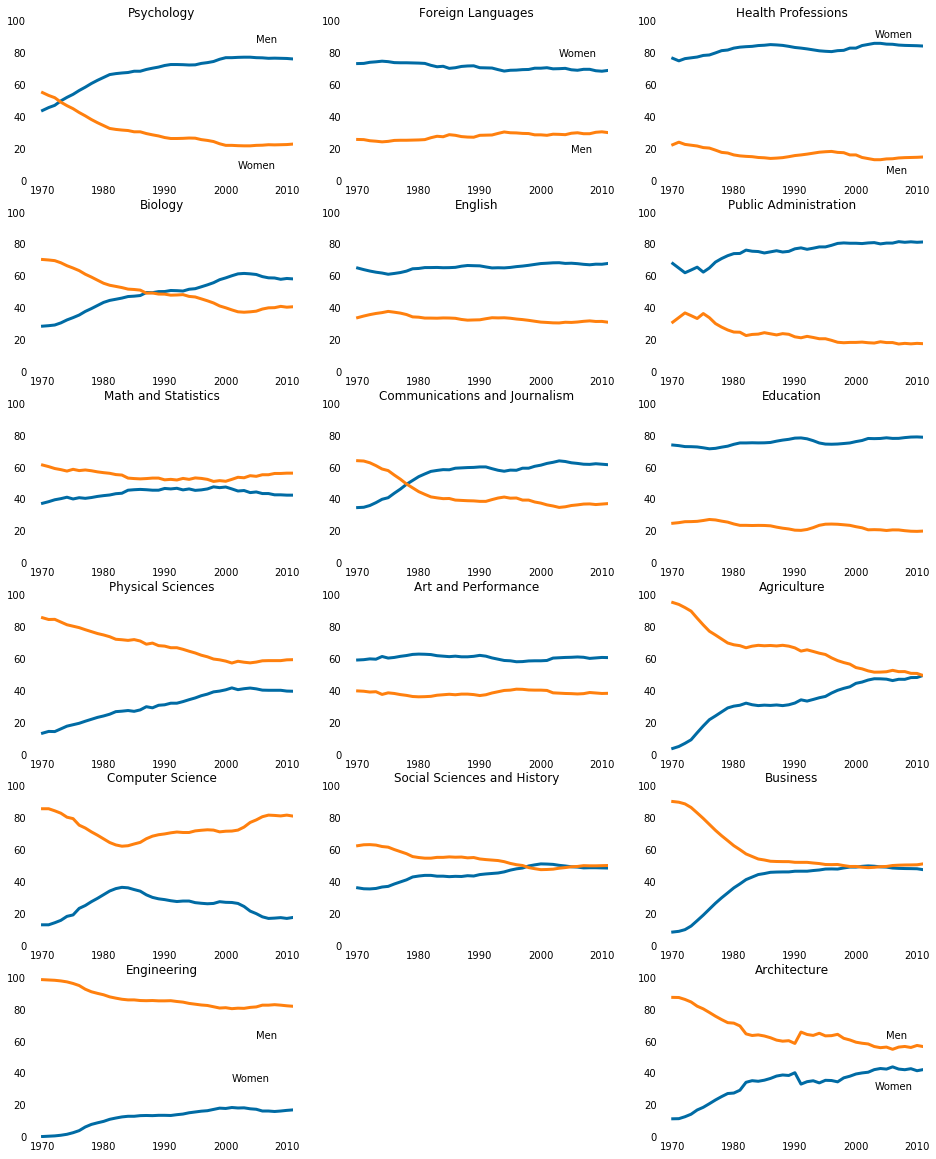

In [19]:
fig = plt.figure(figsize=(16, 20))

# Generating 1st column of graphs for STEM degrees:

for sp in range(0,6):
    ax = fig.add_subplot(6,3,(sp)*3+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        

# Generating 2nd column of graphs for Liberal Arts degrees:
        
for sp in range(0,5):
    ax = fig.add_subplot(6,3,sp*3+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
        
        
# Generating 3rd column of graphs for 'Other' degrees:
        
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')

        
plt.show()

## Reducing Visual Clutter

### Turning off x-axis labels

Above, we have 17 line charts seen in one figure. 

We notice that the non-data elements clutter the field of a view a fair bit. One of the most visible issues is that some titles of line charts overlap with the x-axis labels of the line chart above it. 

X-axis labels should thus be removed for every line chart in each column, except for the bottom-most one.  

This will be done by modifying the call to `Axes.tick_params`, and setting the `labelbottom` parameter to `off` like so:

`ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')`

The bottom-most graphs will have their `labelbottom` turned on using: 
`ax.tick_params(labelbottom='on')`

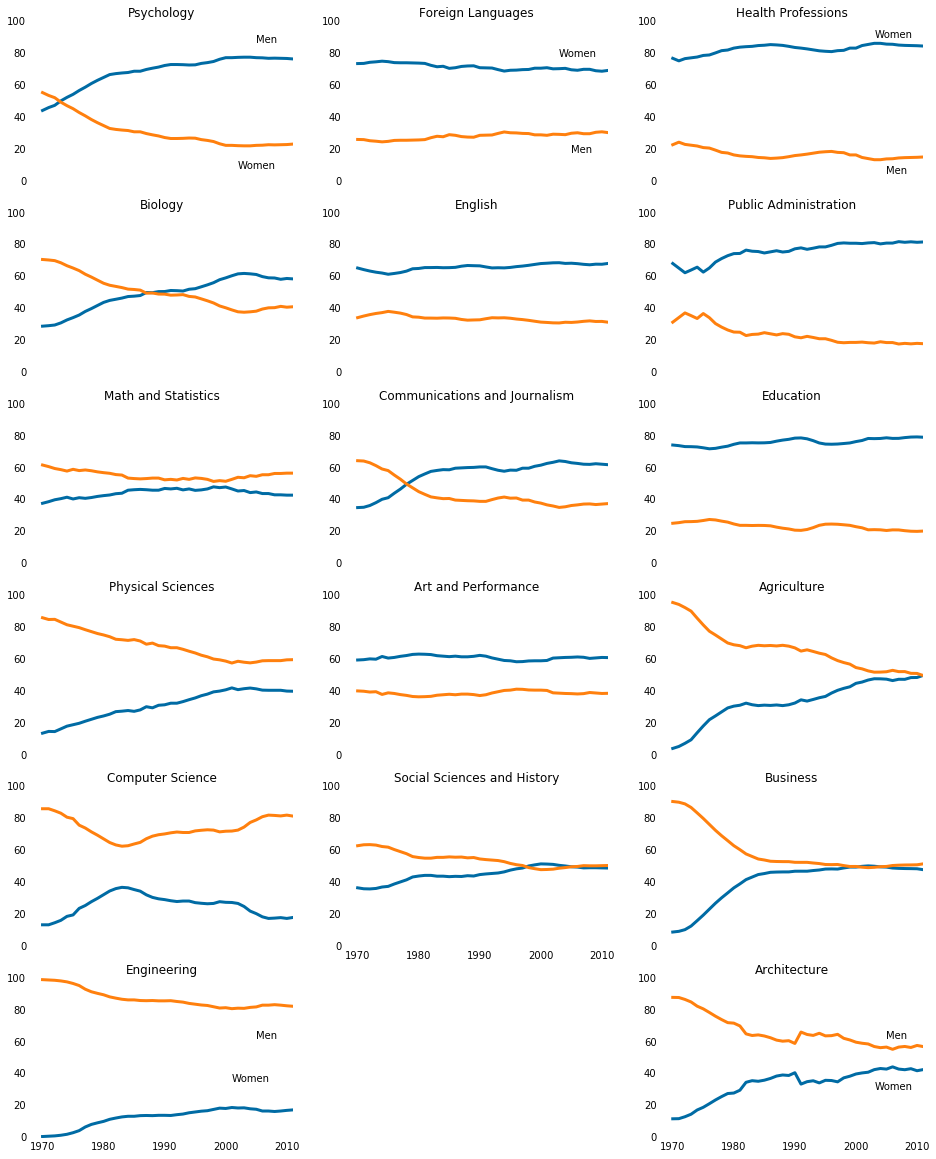

In [20]:
fig = plt.figure(figsize=(16, 20))

# Generating 1st column of graphs for STEM degrees:

for sp in range(0,6):
    ax = fig.add_subplot(6,3,(sp)*3+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom='on')
        

# Generating 2nd column of graphs for Liberal Arts degrees:
        
for sp in range(0,5):
    ax = fig.add_subplot(6,3,sp*3+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
    if sp == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    if sp == 4:
        ax.tick_params(labelbottom='on')
        
        
# Generating 3rd column of graphs for 'Other' degrees:
        
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
    if sp == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')

        
plt.show()

### Simplifying y-axis labels

In a similar vein of further reducing unnecessary cluttering, we'll also simplify the y-axis labels. 

Right now all 17 plots have 6 y-axis labels each. We'll remove all y-axis labels except for '0' and '100'.

The [Axes.set_yticks()](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_yticks) method will be used to specify which labels we want displayed, like so:
`ax.set_yticks([0,100])`

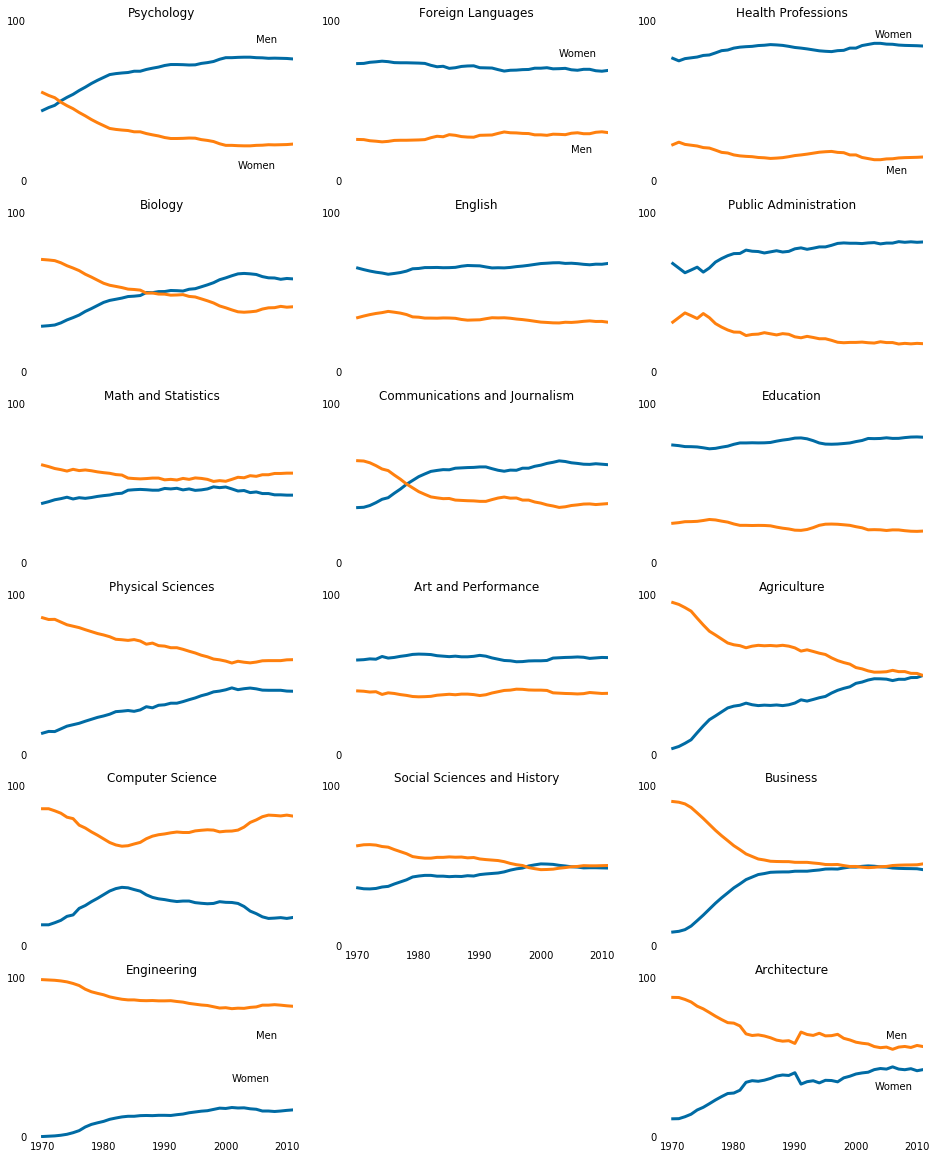

In [21]:
fig = plt.figure(figsize=(16, 20))

# Generating 1st column of graphs for STEM degrees:

for sp in range(0,6):
    ax = fig.add_subplot(6,3,(sp)*3+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom='on')
        

# Generating 2nd column of graphs for Liberal Arts degrees:
        
for sp in range(0,5):
    ax = fig.add_subplot(6,3,sp*3+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
    if sp == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    if sp == 4:
        ax.tick_params(labelbottom='on')
        
        
# Generating 3rd column of graphs for 'Other' degrees:
        
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
    if sp == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')

        
plt.show()

### Adding a Horizontal line to indicate 50% mark

At this juncture, we observe that while removing most y-axis labels certainly reduced some of the visual clutter, it also had the side-effect of making it a little more difficult to observe which degrees have a gender break-down closer to 50-50.

One way we can remedy this is by adding a horizontal line across all the line charts to denote where the 50% mark is. 

A horizontal line can be generated across each subplot by using the [Axes.axhline()](matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.axhline) method, applying the y-axis location as a parameter, like so:

`ax.axhline(50)`

Additionally, we'll use a different colour for this horizontal line with an RGB value of (171, 171, 171). The transparency of the line will also be increased so it doesn't impede the viewing experience, like so:

`ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)`

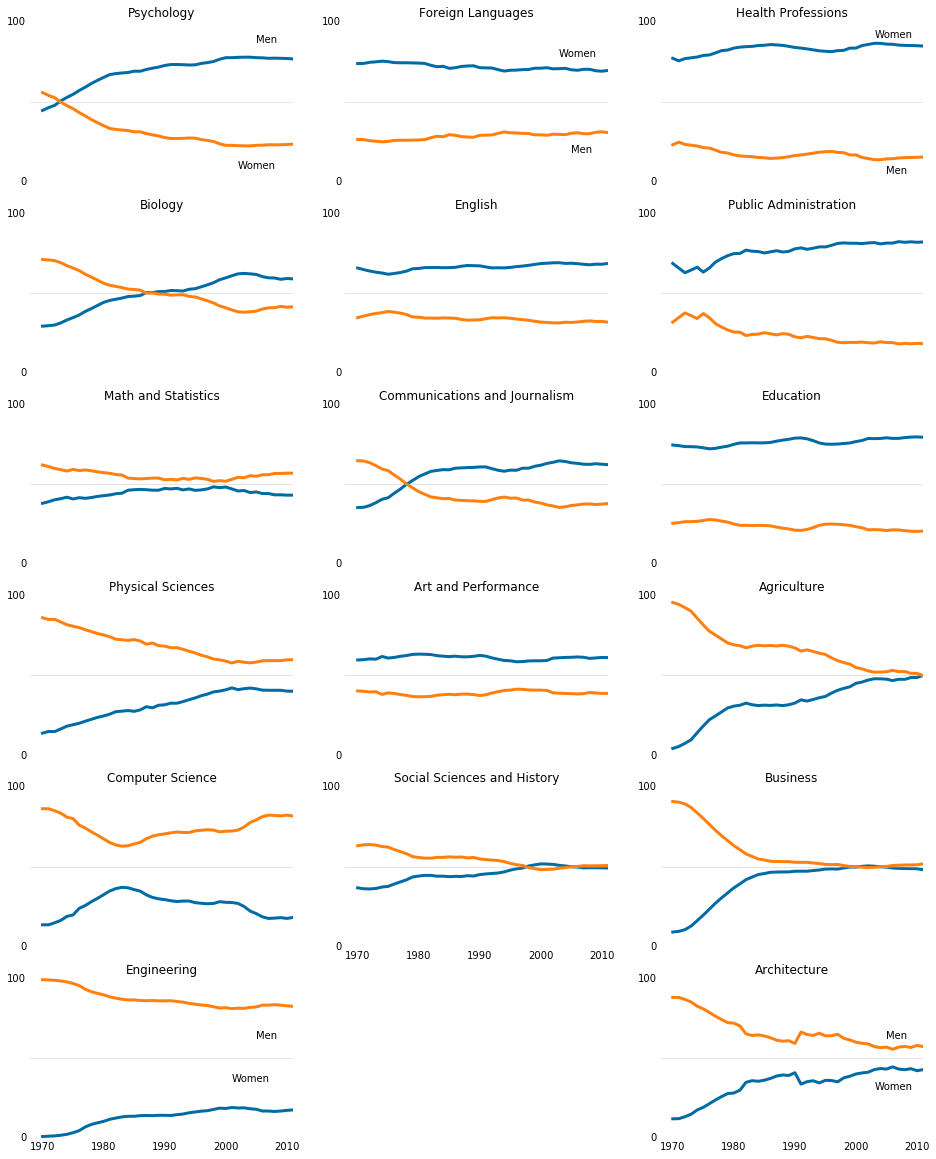

In [22]:
fig = plt.figure(figsize=(16, 20))

# Generating 1st column of graphs for STEM degrees:

for sp in range(0,6):
    ax = fig.add_subplot(6,3,(sp)*3+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom='on')
        

# Generating 2nd column of graphs for Liberal Arts degrees:
        
for sp in range(0,5):
    ax = fig.add_subplot(6,3,sp*3+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if sp == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    if sp == 4:
        ax.tick_params(labelbottom='on')
        
        
# Generating 3rd column of graphs for 'Other' degrees:
        
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if sp == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')

        
plt.show()

We see above that the horizontal line we generated does exactly what we wanted. It clearly indicates the 50% mark, while also being colored and having its transparency altered appropriately so that it doesn't add to the visual clutter much at all.

### Exporting Line Charts to a file

We'll now simply export the figure containing all of the line charts to "gender_degrees.png".

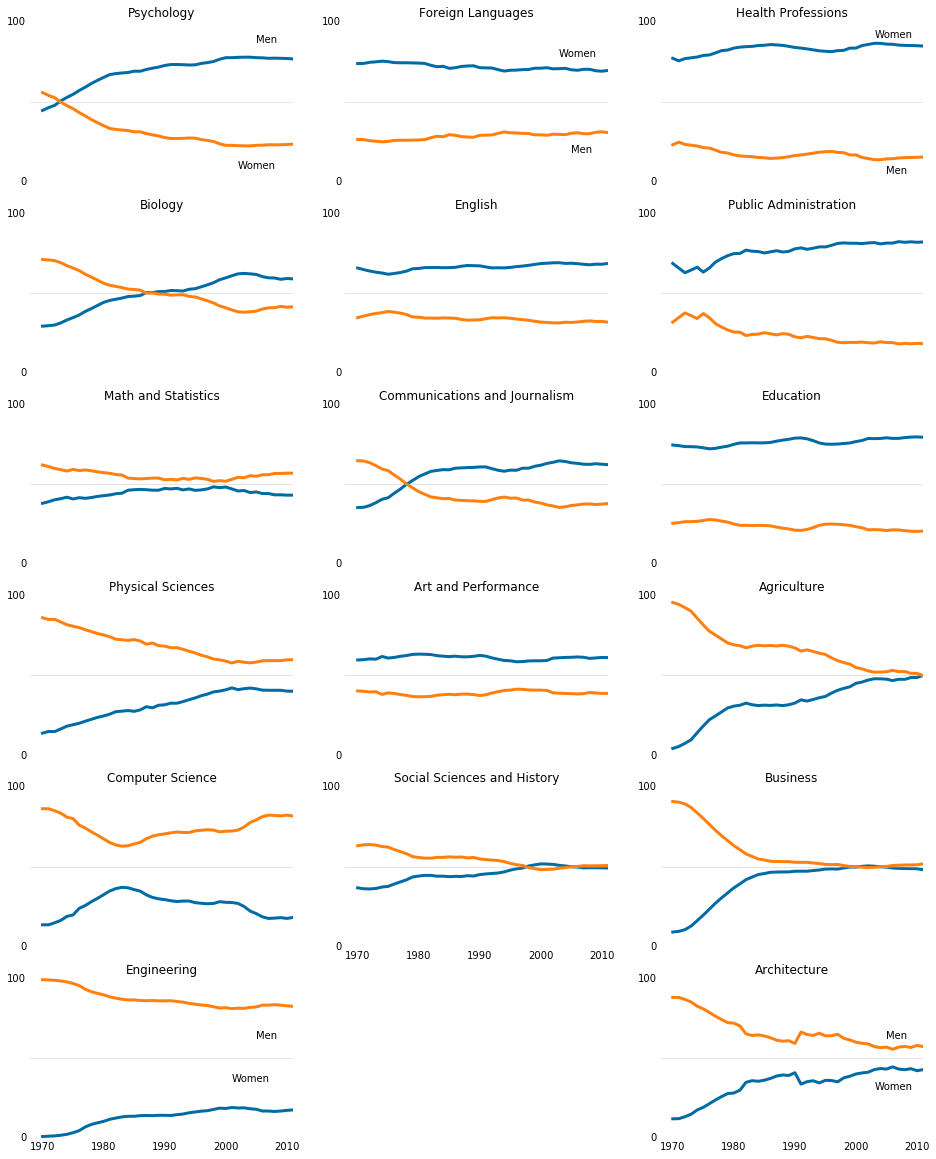

In [26]:
fig = plt.figure(figsize=(16, 20))

# Generating 1st column of graphs for STEM degrees:

for sp in range(0,6):
    ax = fig.add_subplot(6,3,(sp)*3+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom='on')
        

# Generating 2nd column of graphs for Liberal Arts degrees:
        
for sp in range(0,5):
    ax = fig.add_subplot(6,3,sp*3+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if sp == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    if sp == 4:
        ax.tick_params(labelbottom='on')
        
        
# Generating 3rd column of graphs for 'Other' degrees:
        
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    ax.set_yticks([0,100])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if sp == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')

fig.savefig("gender_degrees.png")
plt.show()